![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [23]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Perform preprocessing steps on the dataset to create dummy variables

In [24]:
#create dummy for sex
dummy_df = pd.get_dummies(penguins_df,columns=['sex'],drop_first=True)
scaler = StandardScaler()
#Standardize the data
df_scaled = scaler.fit_transform(dummy_df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']])


## Detect the optimal number of clusters for k-means clustering

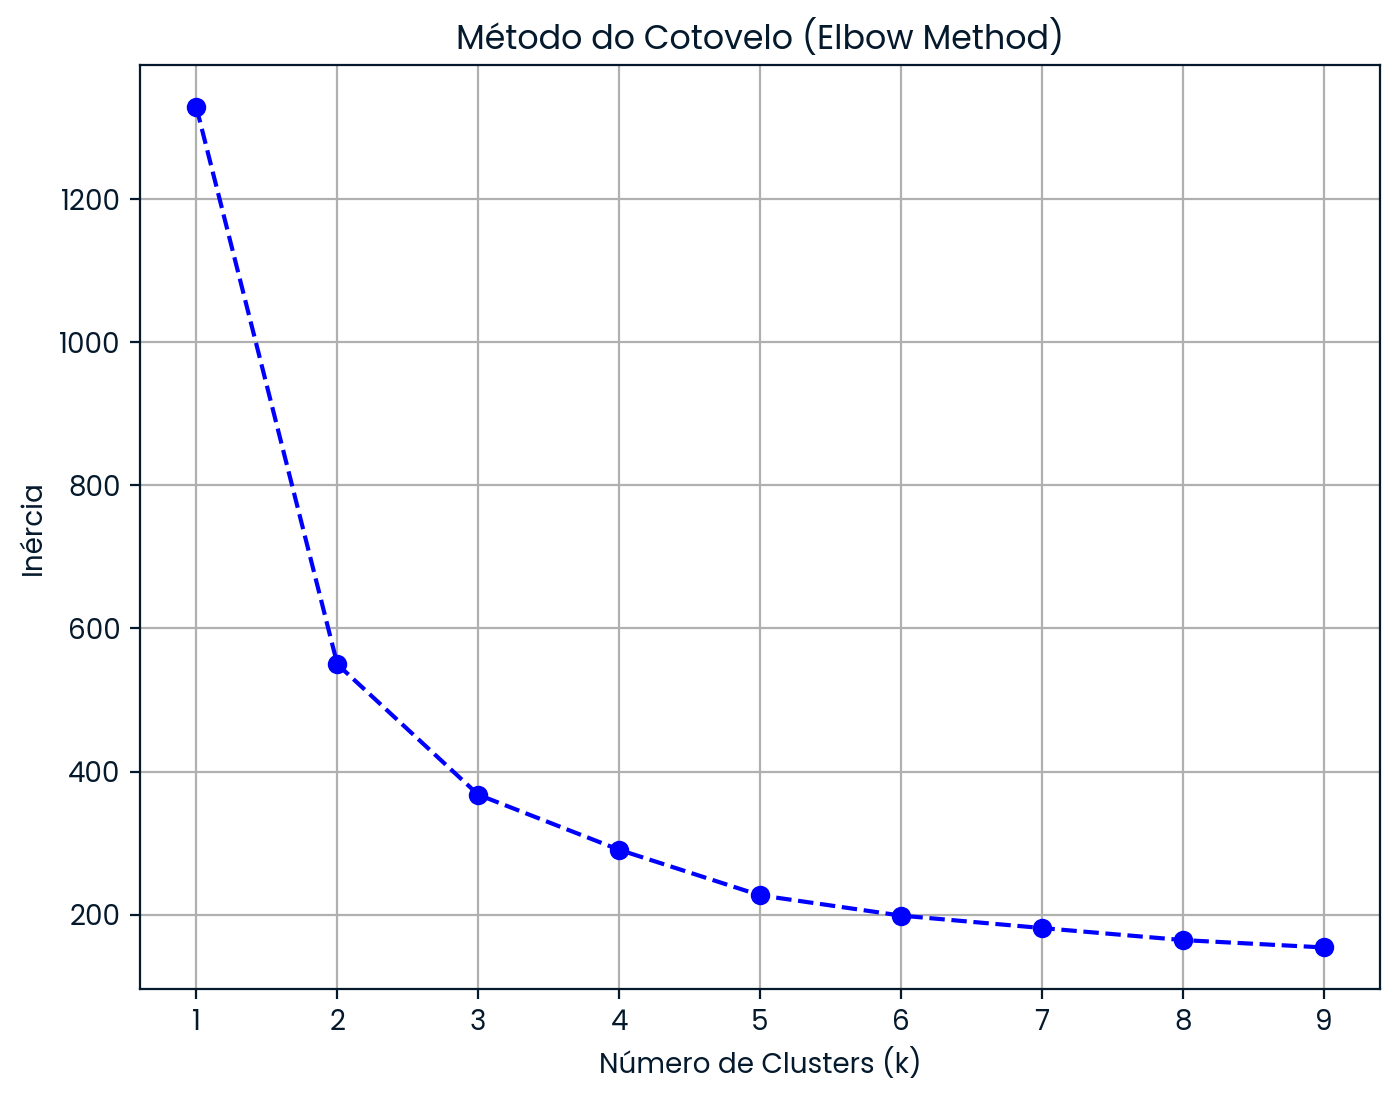

In [25]:
inertia = []

for i in range (1,10):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
# Plotando a inércia em relação ao número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--', color='b')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()


## Run the k-means clustering algorithm

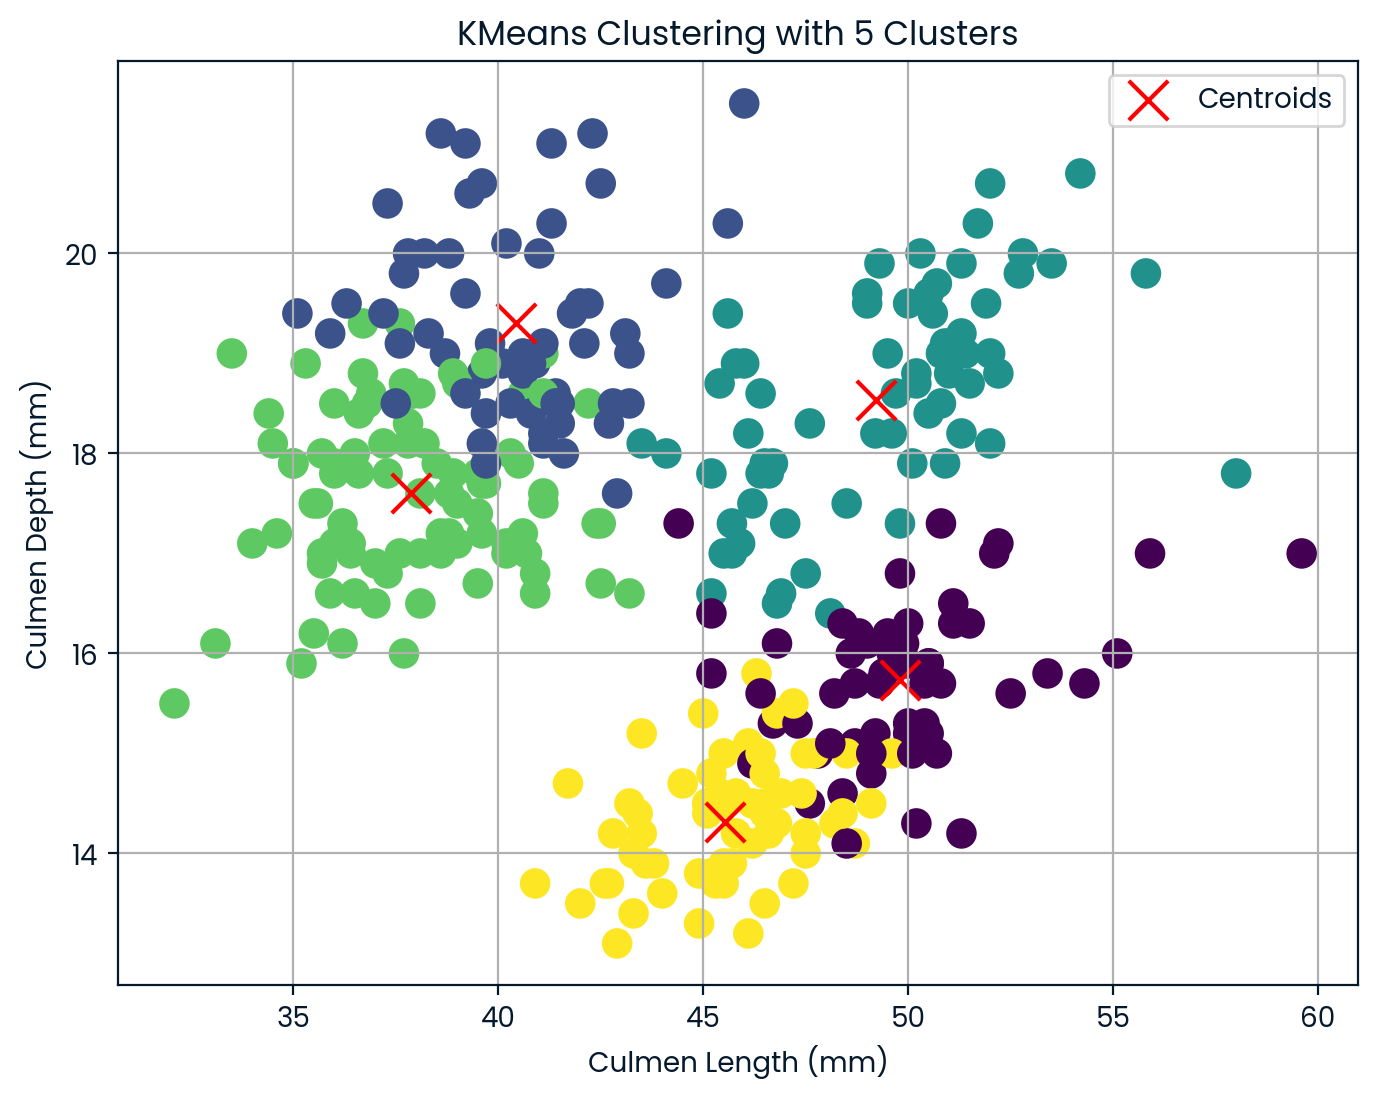

In [26]:
#using the elbow method, 5 is the optimal number
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

dummy_df['cluster']= kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(dummy_df['culmen_length_mm'], dummy_df['culmen_depth_mm'], c=kmeans.labels_, cmap='viridis', s=100)
plt.title(f'KMeans Clustering with {5} Clusters')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')

# Plot the centroids
centroids = kmeans.cluster_centers_

# Since the centroids have been scaled, it is necessary to reverse the patterning to display the original values
centroids_original = scaler.inverse_transform(centroids)

plt.scatter(centroids_original[:, 0], centroids_original[:, 1], marker='x', color='red', s=200, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

## Create a final statistical DataFrame for each cluster.

In [27]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
# create a dataframe for each cluster
stat_penguins = dummy_df.groupby('cluster')[numeric_columns].mean().reset_index()
stat_penguins.head()

,cluster,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,49.792982,15.738596,221.912281,5519.736842
1,1,40.432203,19.301695,193.711864,4108.898305
2,2,49.216923,18.538462,196.830769,3778.461538
3,3,37.862921,17.600000,187.078652,3399.157303
4,4,45.522581,14.314516,212.935484,4699.596774
